## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.models import load_model

## Reading Dataset

In [2]:
df = pd.read_csv('fake_reg.csv')
df.head()

,price,feature1,feature2
0,461.527929,999.787558,999.766096
1,548.130011,998.861615,1001.042403
2,410.297162,1000.070267,998.844015
3,540.382220,999.952251,1000.440940
4,546.024553,1000.446011,1000.338531


## Exploring Dataset

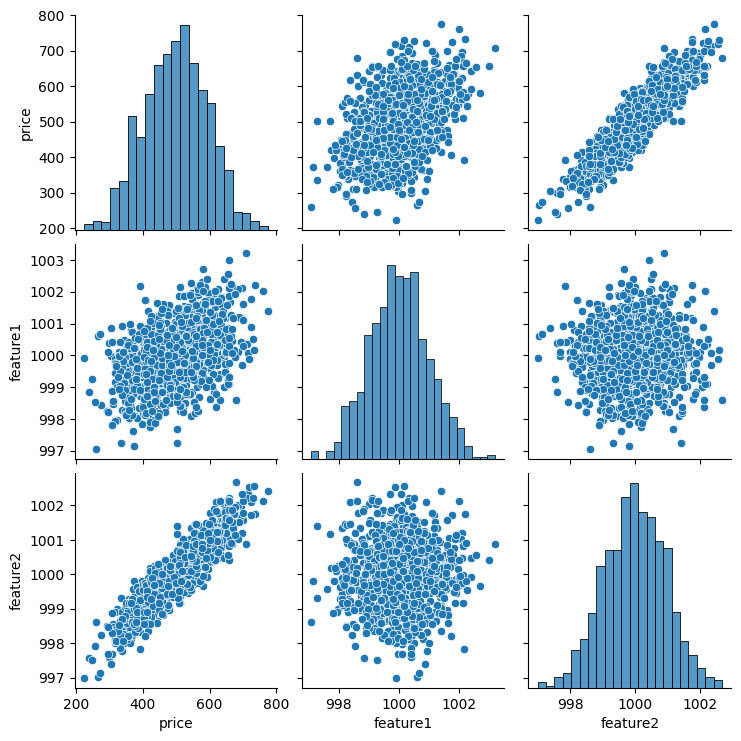

In [3]:
sns.pairplot(df)

## Train Test Split

In [4]:
X = df[['feature1', 'feature2']].values
y = df['price'].values

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.30, random_state=42
)

In [6]:
X_train.shape

(700, 2)

In [7]:
X_test.shape

(300, 2)

## Scaling and Normalizing Data

In [8]:
scaler = MinMaxScaler()

In [9]:
scaler.fit(X_train)

MinMaxScaler()

In [10]:
X_train = scaler.transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

## Creating Model

In [12]:
model = Sequential()

model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=4, activation='relu'))
model.add(Dense(units=1))

model.compile(
    optimizer='rmsprop',
    loss='mse'
)

## Training the Model

In [13]:
model.fit(
    x=X_train,
    y=y_train,
    epochs=250,
)

Epoch 1/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 261211.6406   
Epoch 2/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251265.0938 
Epoch 3/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258940.5469 
Epoch 4/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 260920.8438 
Epoch 5/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 250329.6562 
Epoch 6/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 248605.7500 
Epoch 7/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 256756.5469 
Epoch 8/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 255696.4375 
Epoch 9/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 257032.2656 
Epoch 10/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 252877.3594 
Epoch 11/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 251371.6250 
Epoch 12/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 248883.6250 
Epoch 13/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 258014.6094 
Epoch 14/250
22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss

In [14]:
loss_df = pd.DataFrame(model.history.history)

<Axes: >

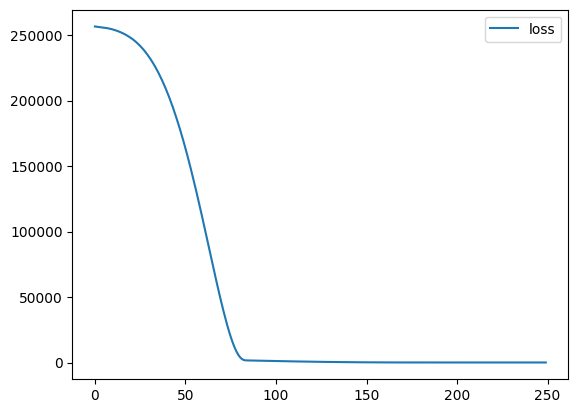

In [15]:
loss_df.plot()

## Model Evaluation

In [16]:
model.evaluate(X_test, y_test, verbose=0)

25.442676544189453

In [17]:
model.evaluate(X_train, y_train, verbose=0)

23.802270889282227

## Model Prediction

In [18]:
test_predictions = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


In [19]:
test_predictions = pd.Series(test_predictions.reshape(300,))

In [20]:
prediction_df = pd.DataFrame(y_test, columns=['Test True Y'])
prediction_df

,Test True Y
0,402.296319
1,624.156198
2,582.455066
3,578.588606
4,371.224104
...,...
295,525.704657
296,502.909473
297,612.727910
298,417.569725


In [21]:
prediction_df = pd.concat([prediction_df, test_predictions], axis=1)
prediction_df

,Test True Y,0
0,402.296319,405.758606
1,624.156198,624.312134
2,582.455066,592.863403
3,578.588606,572.920898
4,371.224104,367.019379
...,...,...
295,525.704657,529.680542
296,502.909473,515.723450
297,612.727910,610.406250
298,417.569725,417.445953


In [22]:
prediction_df.columns = ['Test True Y', 'Model Predictions']
prediction_df

,Test True Y,Model Predictions
0,402.296319,405.758606
1,624.156198,624.312134
2,582.455066,592.863403
3,578.588606,572.920898
4,371.224104,367.019379
...,...,...
295,525.704657,529.680542
296,502.909473,515.723450
297,612.727910,610.406250
298,417.569725,417.445953


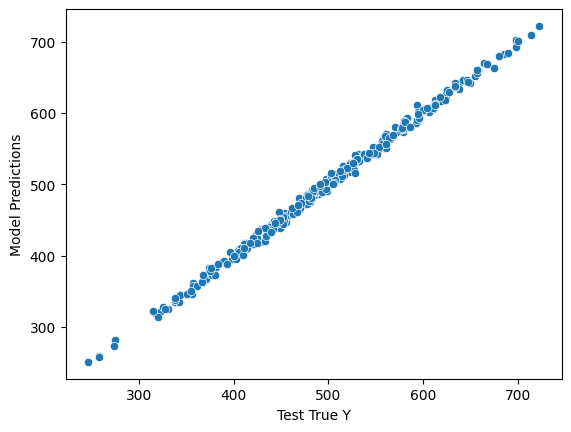

In [23]:
sns.scatterplot(
    x='Test True Y',
    y='Model Predictions',
    data=prediction_df
);

In [24]:
mean_absolute_error(prediction_df['Test True Y'], prediction_df['Model Predictions'])

4.061379055769458

In [25]:
mean_squared_error(prediction_df['Test True Y'], prediction_df['Model Predictions'])

25.442679836489763

In [26]:
np.sqrt(mean_squared_error(prediction_df['Test True Y'], prediction_df['Model Predictions']))

5.044073734243955

In [27]:
r2_score(prediction_df['Test True Y'], prediction_df['Model Predictions'])

0.9971061660370742

## Predicting on New Data

In [28]:
new_gem = [[998, 1000]]

In [29]:
new_gem = scaler.transform(new_gem)

In [30]:
model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([[420.16415]], dtype=float32)

## Saving the Model

In [31]:
model.save('gem_model.keras')

## Loading the Saved Model

In [32]:
loaded_model = load_model('gem_model.keras')

In [33]:
loaded_model.predict(new_gem)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


array([[420.16415]], dtype=float32)